In [1]:
#import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
from pandas.plotting  import table

In [2]:
#set the files variables 
input_file ="Energy_2020_03_13_03_55_PM.csv"
out_filename = "energy_preprocess.csv"

In [3]:
# Convert all white spaces into comma becuase the ActiveFeatures attribute uses 
# comma to seperate features 
f_out = open(out_filename,'w+')
with open(input_file, 'r') as f:
    for line in f:
        striped_line = re.sub("\s+", "|", line.strip())
        f_out.write(striped_line + '\n')
        #print ( striped_line )

f_out.close()


In [4]:
#read data from the csv
data = pd.read_csv(out_filename, sep="|", header=None, error_bad_lines=False, comment='#')

In [5]:
#data 
#from IPython.display import display
#pd.options.display.max_columns = None
#display(data)

In [6]:
# Add columns to the data frame 
data.columns = ['NodeName','Arch','CoresPerSocket','CPUAlloc','CPUErr','CPUTot','CPULoad',\
              'AvailableFeatures','ActiveFeatures','Gres','NodeAddr','NodeHostName','Version',\
              'OS','RealMemory','AllocMem','FreeMem','Sockets','Boards','State','ThreadsPerCore','TmpDisk','Weight',\
              'Owner','MCS_label','Partitions','BootTime','SlurmdStartTime','CfgTRES','AllocTRES','CapWatts','CurrentWatts',\
              'LowestJoules','ConsumedJoules','ExtSensorsJoules','ExtSensorsWatts','ExtSensorsTemp']

In [7]:
# remove preceeding values 
data = data.replace(to_replace ="NodeName=", value ="", regex=True) 
data = data.replace(to_replace ="Arch=", value ="", regex=True) 
data = data.replace(to_replace ="CoresPerSocket=", value ="", regex=True) 
data = data.replace(to_replace ="CPUAlloc=", value ="", regex=True) 
data = data.replace(to_replace ="CPUErr=", value ="", regex=True) 
data = data.replace(to_replace ="CPUTot=", value ="", regex=True)
data = data.replace(to_replace ="CPULoad=", value ="", regex=True)
data = data.replace(to_replace ="AvailableFeatures=", value ="", regex=True)
data = data.replace(to_replace ="ActiveFeatures=", value ="", regex=True)
data = data.replace(to_replace ="Gres=", value ="", regex=True)
data = data.replace(to_replace ="NodeAddr=", value ="", regex=True)
data = data.replace(to_replace ="Version=", value ="", regex=True)
data = data.replace(to_replace ="NodeHostName=", value ="", regex=True)
data = data.replace(to_replace ="OS=", value ="", regex=True)
data = data.replace(to_replace ="RealMemory=", value ="", regex=True)
data = data.replace(to_replace ="AllocMem=", value ="", regex=True)
data = data.replace(to_replace ="FreeMem=", value ="", regex=True)
data = data.replace(to_replace ="Sockets=", value ="", regex=True)
data = data.replace(to_replace ="Boards=", value ="", regex=True)
data = data.replace(to_replace ="State=", value ="", regex=True)
data = data.replace(to_replace ="ThreadsPerCore=", value ="", regex=True)
data = data.replace(to_replace ="TmpDisk=", value ="", regex=True)
data = data.replace(to_replace ="Weight=", value ="", regex=True)
data = data.replace(to_replace ="Owner=", value ="", regex=True)
data = data.replace(to_replace ="MCS_label=", value ="", regex=True)
data = data.replace(to_replace ="ThreadsPerCore=", value ="", regex=True)
data = data.replace(to_replace ="Partitions=", value ="", regex=True)
data = data.replace(to_replace ="BootTime=", value ="", regex=True)
data = data.replace(to_replace ="SlurmdStartTime=", value ="", regex=True)
data = data.replace(to_replace ="CfgTRES=", value ="", regex=True)
data = data.replace(to_replace ="AllocTRES=", value ="", regex=True)
data = data.replace(to_replace ="CapWatts=", value ="", regex=True)
data = data.replace(to_replace ="CurrentWatts=", value ="", regex=True)
data = data.replace(to_replace ="LowestJoules=", value ="", regex=True)
data = data.replace(to_replace ="ConsumedJoules=", value ="", regex=True)
#data = data.replace(to_replace ="ConsumedJoules=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsJoules=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsWatts=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsTemp=", value ="", regex=True)

#data 

In [8]:
# remove some wierd nodes for now 
data = data[data.NodeName != "westmere01"]
data = data[data.NodeName != "serial02"]
data = data[data.NodeName != "node103"]
data = data[data.NodeName != "node93"]
data = data[data.NodeName != "node109"]
data = data[data.NodeName != "node132"]
data = data[data.NodeName != "node133"]
data = data[data.NodeName != "node134"]
#data

In [9]:
# Remove nodes that were not recording any data 
data = data[data.NodeName != "nehalem01"]
data = data[data.NodeName != "nehalem02"]

# convert String variables to int double precision
cols = ['ConsumedJoules', 'LowestJoules']
data[cols] = data[cols].applymap(np.int64)
#data

In [10]:
# sava data to csv 
data.to_csv("processed_energy.csv", index=False)

In [11]:
# Convert  ConsumedJoules  to ConsumedMegajoules
data['ConsumedMegajoules'] = data['ConsumedJoules']/1000000

# Convert  LowestJoules  to Lowestkilojoules
data['Lowestkilojoules'] = data['LowestJoules']/1000
data.head()

,NodeName,Arch,CoresPerSocket,CPUAlloc,CPUErr,CPUTot,CPULoad,AvailableFeatures,ActiveFeatures,Gres,...,AllocTRES,CapWatts,CurrentWatts,LowestJoules,ConsumedJoules,ExtSensorsJoules,ExtSensorsWatts,ExtSensorsTemp,ConsumedMegajoules,Lowestkilojoules
0,gpu01,x86_64,10,0,0,20,0.01,"128gb,broadwell-ep,e5-2640v4","128gb,broadwell-ep,e5-2640v4",gpu:gp100:2,...,,n/a,26,327905,14455238,n/s,0,n/s,14.455238,327.905
1,gpu02,x86_64,8,0,0,16,0.01,"32gb,sandybridge-ep,e5-2665","32gb,sandybridge-ep,e5-2665",gpu:k40c:2,...,,n/a,36,89486,22178750,n/s,0,n/s,22.178750,89.486
4,node01,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),...,cpu=40,n/a,140,508775,97320117,n/s,0,n/s,97.320117,508.775
5,node02,x86_64,1,40,0,40,18.06,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),...,cpu=40,n/a,133,348011,92215966,n/s,0,n/s,92.215966,348.011
6,node03,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),...,cpu=40,n/a,141,502728,96752409,n/s,0,n/s,96.752409,502.728


In [12]:
#deep analysis using different parttions to see how different hardware uses energy.


In [13]:
# Aggregate by partitition and features 
pf_pie_data = data.groupby(['Partitions', 'AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
#f_pie_data = data.groupby(['Partitions'])['ConsumedJoules', 'LowestJoules'].agg({'sum'})
#pf_pie_data.div(f_pie_data, level='Partitions') * 100
pf_pie_data

ConsumedMegajoules  \
Partitions AvailableFeatures                                            
cmsp       omnipart,128gb,broadwell-ep,e5-2640v4              1440.93   
           omnipart,192,broadwell-ep,e5-2640v4                2273.02   
esp        infiniband,32gb,sandybridge-ep,e5-2620              476.25   
esp1       infiniband,64gb,ivybridge-ep,e5-2680v2              944.94   
gpu        128gb,broadwell-ep,e5-2640v4                         14.46   
           32gb,sandybridge-ep,e5-2665                          22.18   
long       infiniband,32gb,sandybridge-ep,e5-2620              264.43   
           infiniband,32gb,sandybridge-ep,e5-2650              200.82   
           infiniband,64gb,ivybridge-ep,e5-2680v2             1383.38   
serial     32gb,sandybridge-ep,e5-2650                          42.15   
testing    32gb,sandybridge-ep,e5-2650                          76.34   

                                                   Lowestkilojoules  
Partitions AvailableFeatures                                         
cmsp       omnipart,128gb,broadwell-ep,e5-2640v4            8533.63  
           omnipart,192,broadwell-ep,e5-2640v4             12609.48  
esp        infiniband,32gb,sandybridge-ep,e5-2620           1924.83  
esp1       infiniband,64gb,ivybridge-ep,e5-2680v2           3261.30  
gpu        128gb,broadwell-ep,e5-2640v4                      327.90  
           32gb,sandybridge-ep,e5-2665                        89.49  
long       infiniband,32gb,sandybridge-ep,e5-2620           1511.23  
           infiniband,32gb,sandybridge-ep,e5-2650           1214.86  
           infiniband,64gb,ivybridge-ep,e5-2680v2           1675.83  
serial     32gb,sandybridge-ep,e5-2650                        99.78  
testing    32gb,sandybridge-ep,e5-2650                       219.33

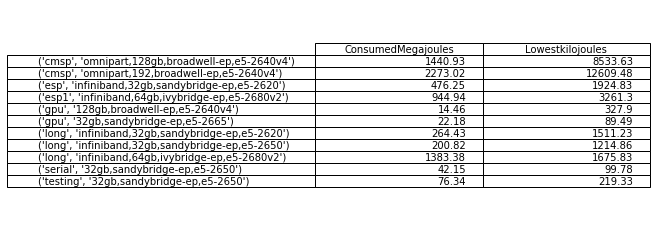

In [43]:
# send data table to image 
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, pf_pie_data,loc='center')
plt.savefig('partition_feature.png')

In [15]:
# Create enrgy pie_data 
#plot = pf_pie_data.plot.pie(subplots=True, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(20, 8))

In [16]:
#Aggregate using agg per partition 
pie_data = data.groupby(['Partitions'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
pie_data


,ConsumedMegajoules,Lowestkilojoules
Partitions,,
cmsp,3713.95,21143.11
esp,476.25,1924.83
esp1,944.94,3261.30
gpu,36.63,417.39
long,1848.63,4401.92
serial,42.15,99.78
testing,76.34,219.33


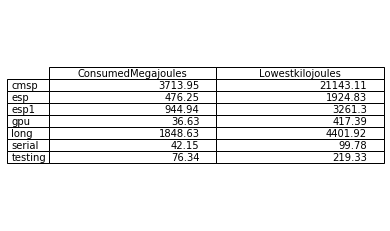

In [44]:
# save data table to partition table image 
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, pie_data,loc='center')
plt.savefig('partition_table.png')

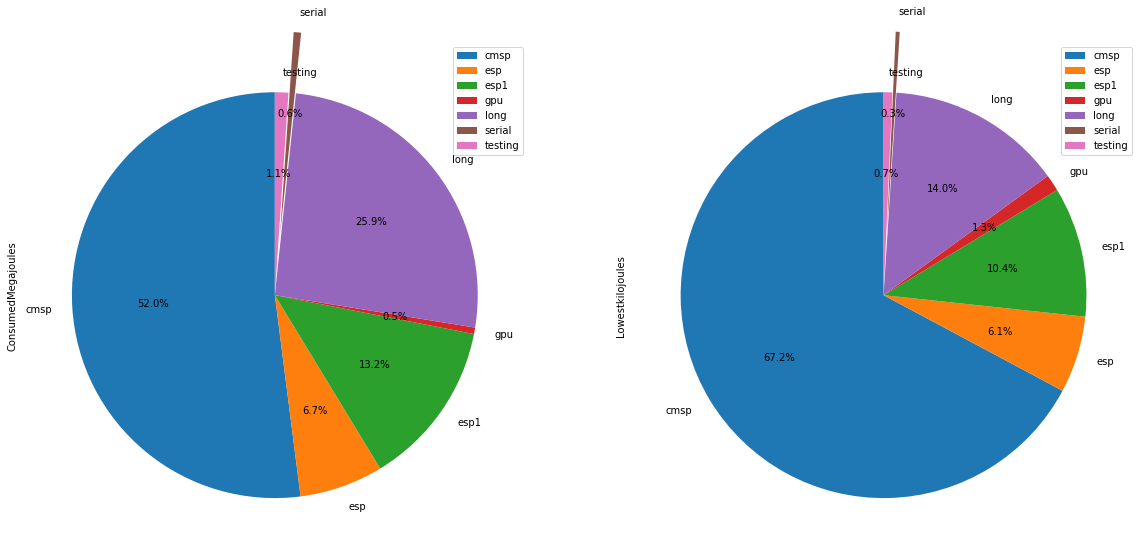

In [18]:
# Create enrgy pie_data 
plot = pie_data.plot.pie(subplots=True, autopct='%1.1f%%',explode=(0, 0, 0, 0, 0, 0.3, 0), startangle=90, figsize=(20, 10))
fig = plot[0].get_figure()
fig.savefig("pie_partition.png")

In [19]:
sub_data = data.loc[:, ['ConsumedMegajoules','NodeName','Lowestkilojoules', 'Partitions', 'AvailableFeatures']]
sub_data

,ConsumedMegajoules,NodeName,Lowestkilojoules,Partitions,AvailableFeatures
0,14.455238,gpu01,327.905,gpu,"128gb,broadwell-ep,e5-2640v4"
1,22.178750,gpu02,89.486,gpu,"32gb,sandybridge-ep,e5-2665"
4,97.320117,node01,508.775,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4"
5,92.215966,node02,348.011,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4"
6,96.752409,node03,502.728,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4"
...,...,...,...,...,...
144,91.436006,node183,599.478,cmsp,"omnipart,192,broadwell-ep,e5-2640v4"
145,86.243392,node184,415.349,cmsp,"omnipart,192,broadwell-ep,e5-2640v4"
146,42.151075,serial01,99.783,serial,"32gb,sandybridge-ep,e5-2650"
148,39.330559,testing01,113.153,testing,"32gb,sandybridge-ep,e5-2650"


In [20]:
#Get the statistsics of the database classification per patition
sub_data.describe().round(2)

,ConsumedMegajoules,Lowestkilojoules
count,141.00,141.00
mean,50.63,223.17
std,37.37,217.83
min,11.66,10.27
25%,15.56,81.57
50%,31.45,128.07
75%,90.39,347.88
max,119.69,916.75


In [21]:
# Calulcate this per feature.
feature_pie_data = data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
feature_pie_data

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"128gb,broadwell-ep,e5-2640v4",14.46,327.90
"32gb,sandybridge-ep,e5-2650",118.49,319.11
"32gb,sandybridge-ep,e5-2665",22.18,89.49
"infiniband,32gb,sandybridge-ep,e5-2620",740.68,3436.06
"infiniband,32gb,sandybridge-ep,e5-2650",200.82,1214.86
"infiniband,64gb,ivybridge-ep,e5-2680v2",2328.32,4937.13
"omnipart,128gb,broadwell-ep,e5-2640v4",1440.93,8533.63
"omnipart,192,broadwell-ep,e5-2640v4",2273.02,12609.48


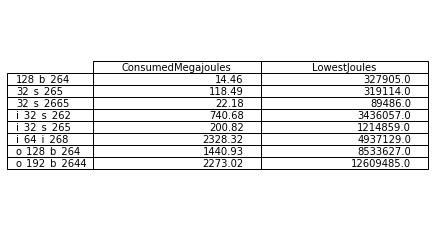

In [45]:
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, feature_pie_data,loc='center')
plt.savefig('feature_table.png')

In [23]:
# Create enrgy pie_data  for features 
#plot1 = feature_pie_data.plot.pie(y='ConsumedMegajoules', subplots=True, autopct='%1.1f%%',explode=(0, 0, 0.3, 0, 0, 0, 0,0), startangle=90, figsize=(10, 10))
#fig = plot1[0].get_figure()
#fig.savefig("consumedjoules_pie_feature.png")

In [24]:
# Create enrgy pie_data  for features 
#plot1 = feature_pie_data.plot.pie(y='LowestJoules', subplots=True, autopct='%1.1f%%',explode=(0, 0, 0.3, 0, 0, 0, 0,0), startangle=90, figsize=(10, 10))
#fig = plot1[0].get_figure()
#fig.savefig("lowestjoules_pie_feature.png")

In [25]:
# do analysis for cmsp
#cmsp_data= data[]
cmsp_data = sub_data.loc[sub_data['Partitions'] == 'cmsp']  

In [26]:
cmsp_pie_data = cmsp_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
cmsp_pie_data

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"omnipart,128gb,broadwell-ep,e5-2640v4",1440.93,8533.63
"omnipart,192,broadwell-ep,e5-2640v4",2273.02,12609.48


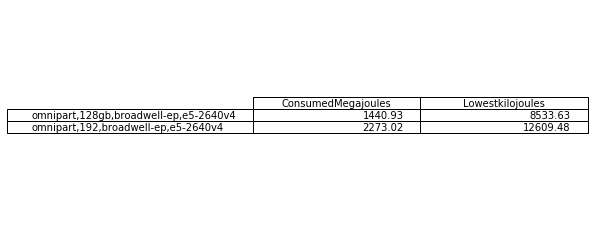

In [46]:
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, cmsp_pie_data,loc='center')
plt.savefig('cmsp_table.png')

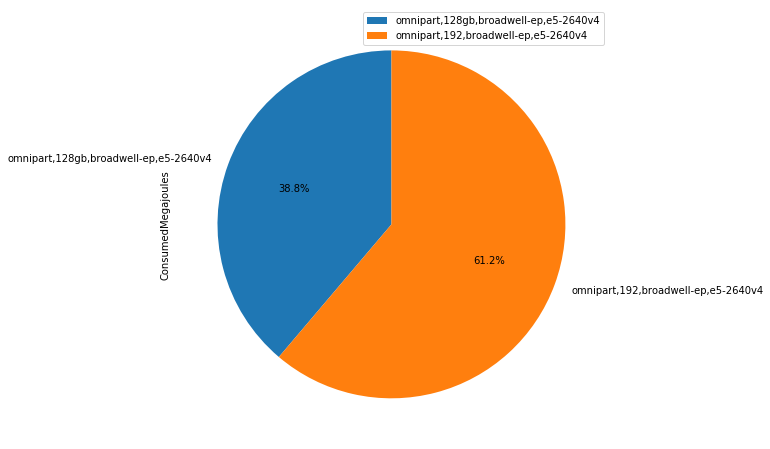

In [28]:
#csm energy ConsumedMegajoules plot 
plot1 = cmsp_pie_data.plot.pie(y='ConsumedMegajoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
fig = plot1[0].get_figure()
fig.savefig("consumedjoules_cmsp_partition.png")

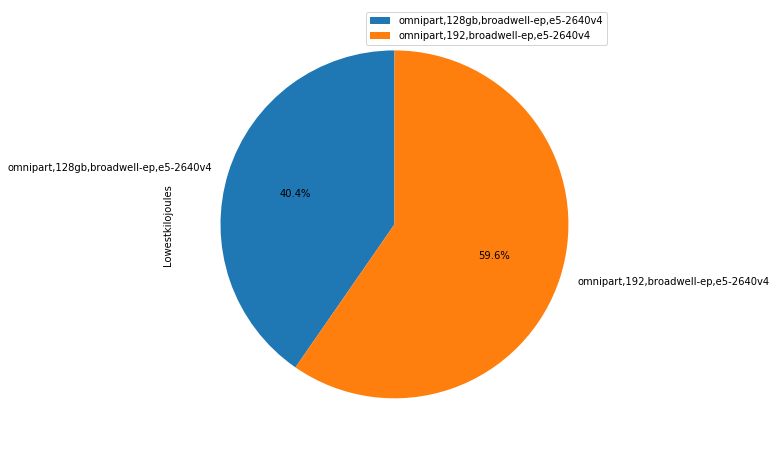

In [29]:
#csm energy Lowestkilojoules plot 
plot1 = cmsp_pie_data.plot.pie(y='Lowestkilojoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
fig = plot1[0].get_figure()
fig.savefig("lowestjoules_cmsp_partition.png")

In [30]:
# do analysis for long
#cmsp_data= data[]
long_data = sub_data.loc[sub_data['Partitions'] == 'long']  
long_pie_data = long_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
long_pie_data
#long_pie_data.describe().round(2)

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"infiniband,32gb,sandybridge-ep,e5-2620",264.43,1511.23
"infiniband,32gb,sandybridge-ep,e5-2650",200.82,1214.86
"infiniband,64gb,ivybridge-ep,e5-2680v2",1383.38,1675.83


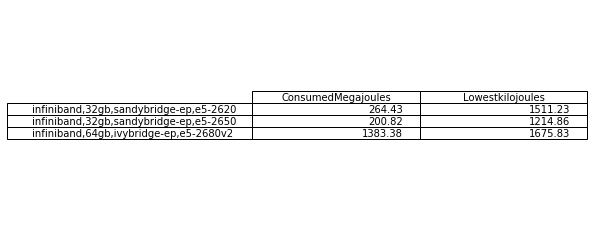

In [47]:
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, long_pie_data,loc='center')
plt.savefig('long_table.png')

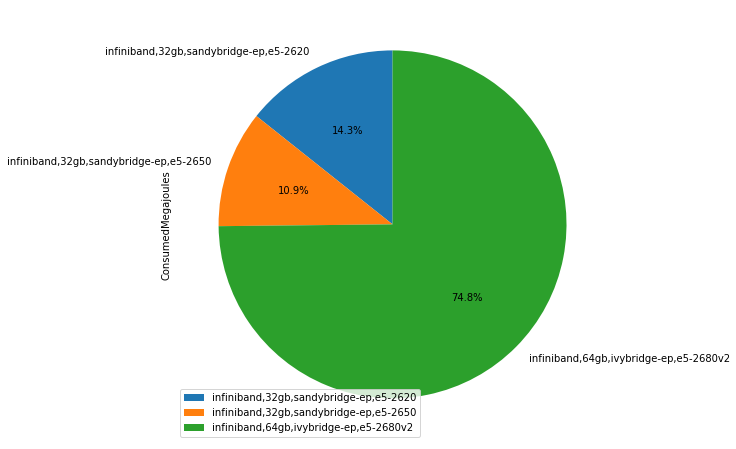

In [32]:
#long energy ConsumedMegajoules plot 
long_pie = long_pie_data.plot.pie(y='ConsumedMegajoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))
fig = long_pie[0].get_figure()
fig.savefig("long_partition.png")

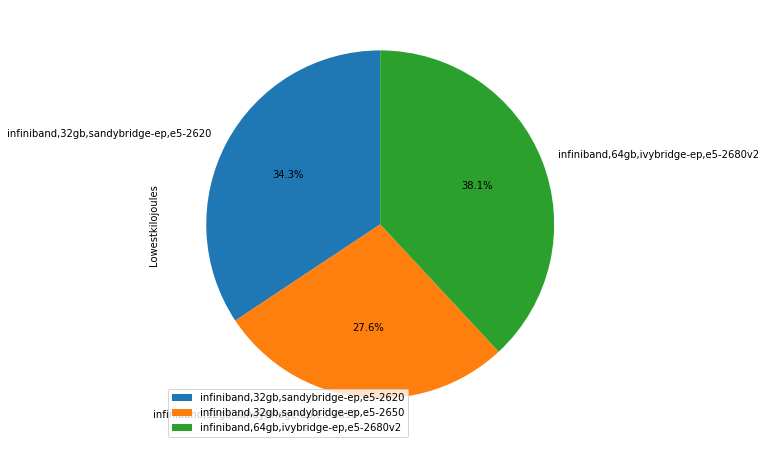

In [33]:
#long energy plot 
long_pie = long_pie_data.plot.pie(y='Lowestkilojoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))
fig = long_pie[0].get_figure()
fig.savefig("LowestJoules_long_partition.png")

In [34]:
#do this for esp
gpu_data = sub_data.loc[sub_data['Partitions'] == 'gpu']  
gpu_pie_data = gpu_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
gpu_pie_data

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"128gb,broadwell-ep,e5-2640v4",14.46,327.90
"32gb,sandybridge-ep,e5-2665",22.18,89.49


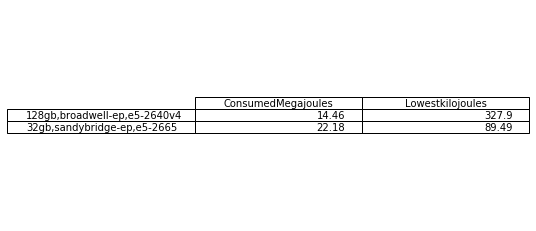

In [48]:
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, gpu_pie_data,loc='center')
plt.savefig('gpu_table.png')

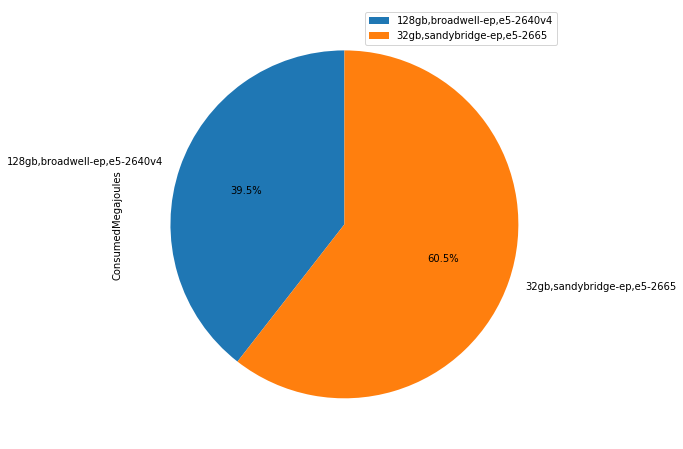

In [36]:
#long energy plot 
gpu_pie = gpu_pie_data.plot.pie(y='ConsumedMegajoules', subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))
fig = long_pie[0].get_figure()
fig.savefig("ConsumedJoules_gpu_partition.png")

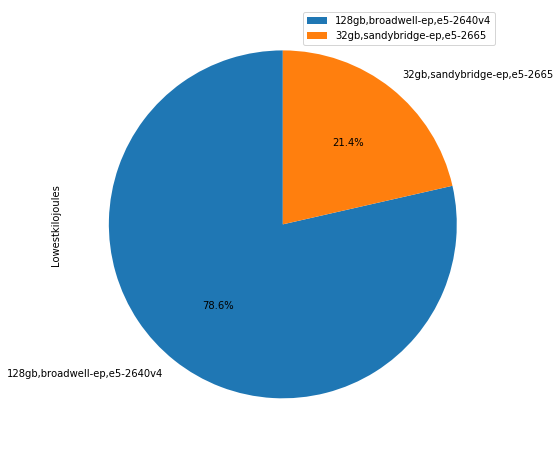

In [37]:
# All other partitoions serial, test, long 
gpu_pie = gpu_pie_data.plot.pie(y='Lowestkilojoules', subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))
fig = long_pie[0].get_figure()
fig.savefig("gpu_joules_gpu_partition.png")

In [40]:
#create link between the available features to short hand
# omnipart,128gb,broadwell-ep,e5-2640v4  - o_128_b_264
# omnipart,192,broadwell-ep,e5-2640v - o_192_b_264
# infiniband,32gb,sandybridge-ep,e5-2620 - i_32_s_262
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 128gb,broadwell-ep,e5-2640v4 - 128_b_264
# 32gb,sandybridge-ep,e5-2665 - 32_s_2665
# infiniband,32gb,sandybridge-ep,e5-2650 - i_32_s_265
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 32gb,sandybridge-ep,e5-2650 - 32_s_265

#data = data.replace(to_replace ="omnipart,128gb,broadwell-ep,e5-2640v4", value ="o_128_b_264", regex=True) 
#data = data.replace(to_replace ="omnipart,192,broadwell-ep,e5-2640v", value ="o_192_b_264", regex=True) 
#data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2620", value ="i_32_s_262", regex=True) 
#data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True) 
#data = data.replace(to_replace ="128gb,broadwell-ep,e5-2640v4", value ="128_b_264", regex=True) 
#data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2665", value ="32_s_2665", regex=True)
#data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2650", value ="i_32_s_265", regex=True)
#data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True)
#data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2650", value ="32_s_265", regex=True)




In [49]:
# Calulcate this per feature.
feature_pie_data = data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'LowestJoules'].agg('sum').round(2)
feature_pie_data

,ConsumedMegajoules,LowestJoules
AvailableFeatures,,
128_b_264,14.46,327905
32_s_265,118.49,319114
32_s_2665,22.18,89486
i_32_s_262,740.68,3436057
i_32_s_265,200.82,1214859
i_64_i_268,2328.32,4937129
o_128_b_264,1440.93,8533627
o_192_b_2644,2273.02,12609485


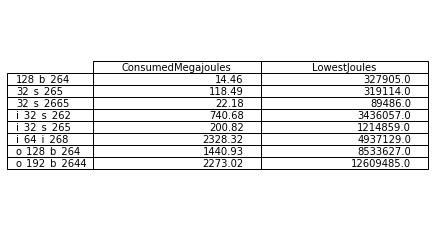

In [51]:
#feature table 
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, feature_pie_data,loc='center')
plt.savefig('feature_table.png')

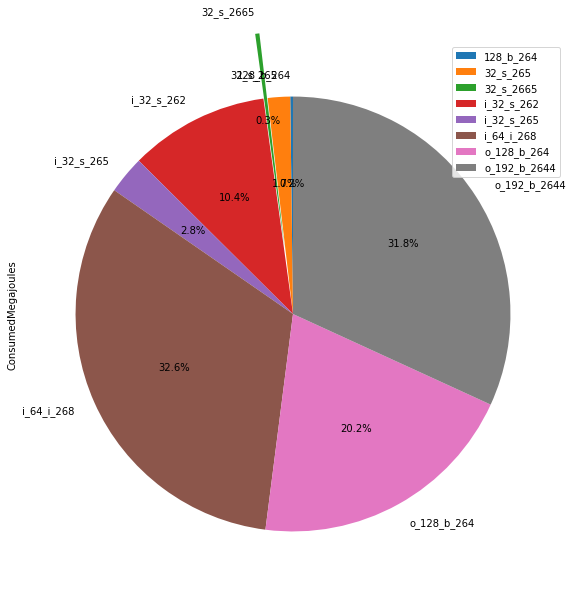

In [87]:
# Create enrgy pie_data  for features 
plot1 = feature_pie_data.plot.pie(y='ConsumedMegajoules', subplots=True, autopct='%1.1f%%',explode=(0, 0, 0.3, 0, 0, 0, 0,0), startangle=90, figsize=(10, 10))
fig = plot1[0].get_figure()
fig.savefig("consumedjoules_pie_feature.png")